<a href="https://colab.research.google.com/github/SMMiroE/Herramientas-de-calculo-y-simulacion-de-procesos-dinamicos/blob/main/SMME_Modulo_1__Semana_6_A1Ej3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Curso Herramientas para la simulacion de Sistemas Dinamicos**

**Actividades Semana 6**

**Lenguaje Julia**  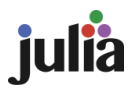
https://julialang.org/

In [ ]:
# @title
versioninfo() #setear a Runtime en Julia  https://julialang.org/learning/

Julia Version 1.10.9
Commit 5595d20a287 (2025-03-10 12:51 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, broadwell)
Threads: 2 default, 0 interactive, 1 GC (on 2 virtual cores)
Environment:
  LD_LIBRARY_PATH = /usr/local/nvidia/lib:/usr/local/nvidia/lib64
  JULIA_NUM_THREADS = auto


In [ ]:
# @title

using Plots

In [ ]:
# @title

using Pkg;


In [ ]:
# @title

Pkg.add("LaTeXStrings")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


In [ ]:
# @title
# Instala el kernel de Julia y librerías (ejecutar una vez por sesión)
using Pkg
Pkg.add("IJulia")
Pkg.add("Plots")
Pkg.add("GR") # GR es un backend rápido para Plots
Pkg.add("SpecialFunctions")
import Pkg
Pkg.add("PlotlyJS")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
  [28b8d3ca] + GR v0.73.16
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
  [276daf66] + SpecialFunctions v2.5.1
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
   Installed Pidfile ─────────────── v1.3.0
   Installed Lazy ────────────────── v0.15.1
   Installed AssetRegistry ───────── v0.1.0
   Installed PlotlyBase ──────────── v0.8.21
   Installed Hiccup ──────────────── v0.2.2
   Installed PlotlyKaleido ───────── v2.3.0
   Installed WebIO ──────────────

**Ejercicio 1. Sistema RLC**

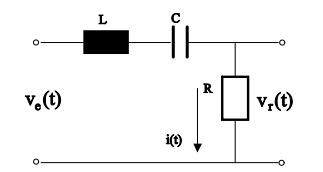

Fig. 5-1. Esquemático del circuito RLC.

Sea el sistema eléctrico de la Fig. 5-1, se requiere obtener la evolución temporal de la corriente para
diferentes tensiones de entrada.

Para el caso de asignarle valores unitarios a Ve, R, L y C, con entra entrada Heaviside unitaria se obtuvo la solución analítica como

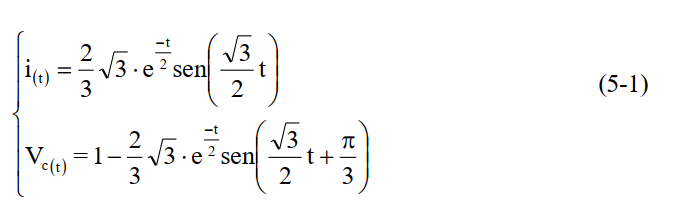

Expresión matricial

Para determinar la evolución de la corriente del circuito se pueden plantear las ecuaciones diferenciales del mismo como,

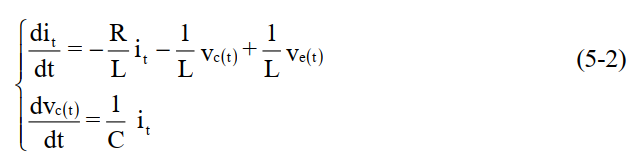

Las Ec. (5-2) se pueden expresar en una ecuación matricial-vectorial con las representaciones en variables de estado definiendo a i, vc como variables de estado y a x como vector de estado, es decir x=[ i vc]T se convierte en

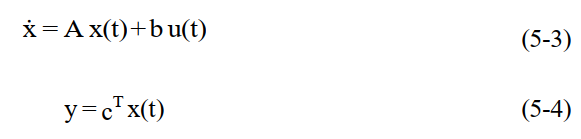

donde las matrices contienen a los coeficientes del circuito,

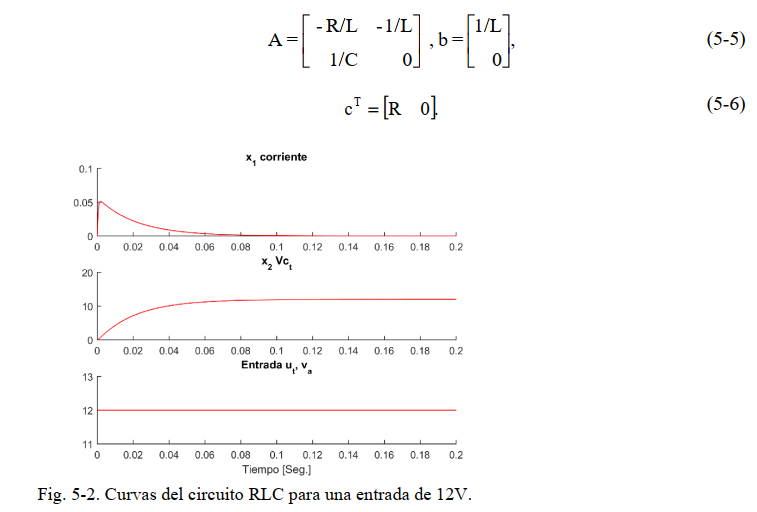

Nótese que las ecuaciones (5-1) son la solución al sistema para coeficientes específicos, en este caso, de valor unitario.

**Actividades.**

3- Asumir que la tensión de entrada cambia de signo cada 1ms.
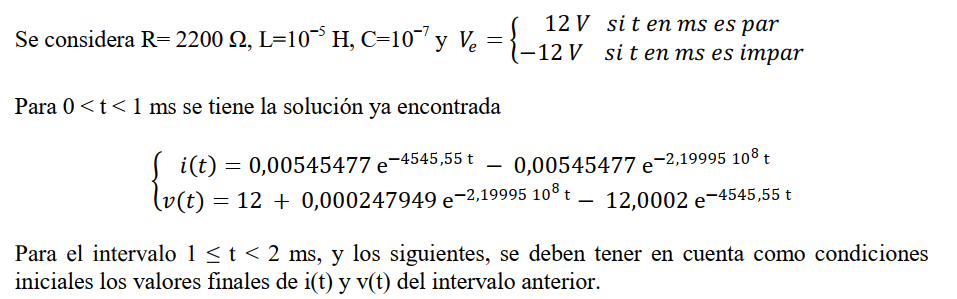

In [ ]:
# @title
using Plots
using LinearAlgebra

#gr()  # Alternativa a plotlyjs() si falla en Colab

# Parámetros del circuito
R = 2.2e3     # Ohm
L = 10e-6     # H
C = 100e-9    # F
h = 1e-9      # s (mucho más razonable para Colab)
t_simul = 4e-3

num_points = floor(Int, t_simul / h) + 1
t_vector = zeros(Float64, num_points)
x1_current = zeros(Float64, num_points)
x2_voltage = zeros(Float64, num_points)
u_input = zeros(Float64, num_points)

state_vector = [0.0, 0.0]  # [i_L, v_c]

# Inicialización
for ii in 1:num_points
    current_t = (ii - 1) * h
    Va_current = (-1)^floor(Int, current_t / 1e-3) * 12.0

    # EDOs
    di_dt = (-R/L)*state_vector[1] - (1/L)*state_vector[2] + (1/L)*Va_current
    dvc_dt = (1/C)*state_vector[1]

    # Euler
    state_vector[1] += di_dt * h
    state_vector[2] += dvc_dt * h

    # Guardar
    t_vector[ii] = current_t
    u_input[ii] = Va_current
    x1_current[ii] = state_vector[1]
    x2_voltage[ii] = state_vector[2]
end

# Gráficos
plot_i = plot(t_vector, x1_current * 1000, label="i_L (mA)", xlabel="t (s)", ylabel="Corriente", color=:blue)
plot_vc = plot(t_vector, x2_voltage, label="v_c (V)", xlabel="t (s)", ylabel="Voltaje", color=:red)
plot_u = plot(t_vector, u_input, label="V_a (V)", xlabel="t (s)", ylabel="Entrada", color=:green)

plot(plot_i, plot_vc, plot_u, layout=(3,1), size=(800, 1000), plot_title="Simulación RLC con Entrada Alternada")
